In [1]:
!pip install fbprophet

     |████████████████████████████████| 51kB 389kB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 1.3MB/s eta 0:00:01     |██▊                             | 245kB 1.3MB/s eta 0:00:03     |████████████████████████████▌   | 2.6MB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 37.4MB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 15.9MB 806kB/s eta 0:00:01    |██████                          | 3.0MB 9.6MB/s eta 0:00:02     |██████████                      | 5.0MB 1.3MB/s eta 0:00:09
     |████████████████████████████████| 14.4MB 4.8MB/s eta 0:00:01     |███████████▌                    | 5.2MB 4.5MB/s eta 0:00:03
     |████████████████████████████████| 81kB 9.3MB/s  eta 0:00:01
     |████████████████████████████████| 512kB 19.3MB/s eta 0:00:01
     |████████████████████████████████| 122kB 8.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 7.9MB/s eta 0:00:011
     |████████████████████████████████| 747kB 14.7MB/s eta 0:00:01
  ERROR: Com

  Stored in directory: /Users/uiandwe/Library/Caches/pip/wheels/2d/cc/52/784fca01997448402695e3d0356d2f9c814d545bbcdef45d26
  Stored in directory: /Users/uiandwe/Library/Caches/pip/wheels/c2/19/af/23739730a62bb43acb1ff256c9234b0f1a94c4666c140a3c1d
Successfully built holidays ephem
Failed to build fbprophet
  Running setup.py install for fbprophet ... done


In [2]:
!pip install pandas

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./avocado.csv')

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [9]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]
df['Date'] = pd.to_datetime(df['Date'])
data = df[['Date', 'AveragePrice']].reset_index(drop=True)
data = data.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})


/Users/uiandwe/env/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


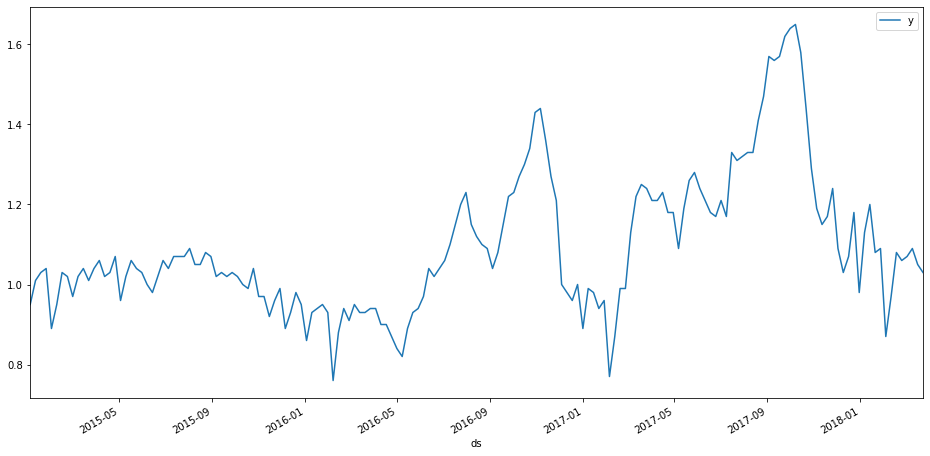

In [12]:
data.plot(x='ds', y='y', figsize=(16, 8))

In [14]:
from fbprophet import Prophet

In [16]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.163002,0.963706,1.234757,1.094884,1.231744,-0.061007,-0.061007,-0.061007,-0.061007,-0.061007,-0.061007,0.0,0.0,0.0,1.101996
530,2019-03-22,1.162874,0.965341,1.228282,1.094449,1.232075,-0.059586,-0.059586,-0.059586,-0.059586,-0.059586,-0.059586,0.0,0.0,0.0,1.103288
531,2019-03-23,1.162745,0.959958,1.242611,1.094036,1.232392,-0.057689,-0.057689,-0.057689,-0.057689,-0.057689,-0.057689,0.0,0.0,0.0,1.105056
532,2019-03-24,1.162616,0.985106,1.242536,1.093628,1.232706,-0.055330,-0.055330,-0.055330,-0.055330,-0.055330,-0.055330,0.0,0.0,0.0,1.107286
533,2019-03-25,1.162488,0.978927,1.236421,1.093221,1.232922,-0.052542,-0.052542,-0.052542,-0.052542,-0.052542,-0.052542,0.0,0.0,0.0,1.109946


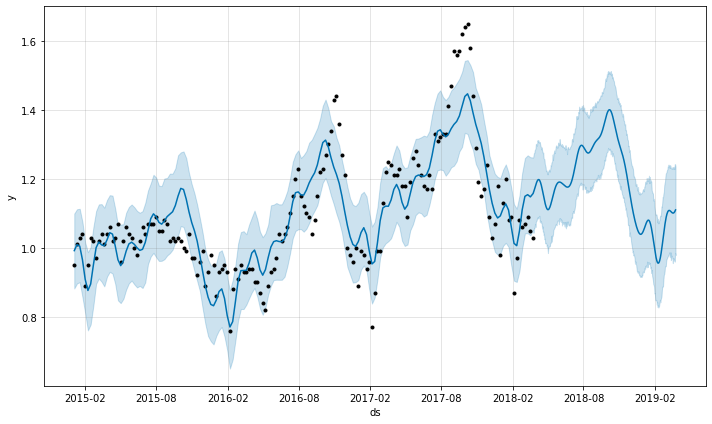

In [17]:
fig1 = model.plot(forecast)

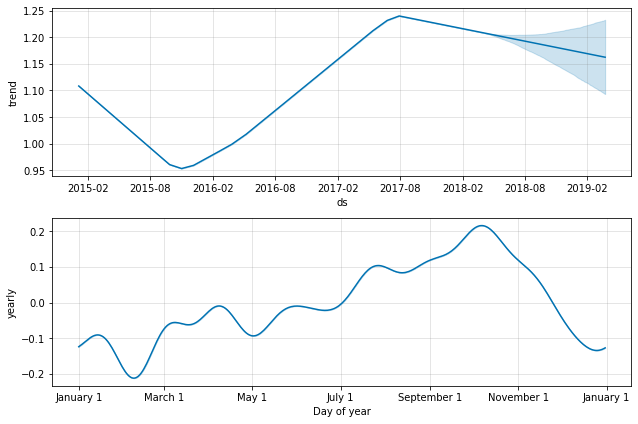

In [18]:
fig2 = model.plot_components(forecast)